# Detection

In [31]:
import os
import logging
from ultralytics import YOLO
from pathlib import Path
from helpers import save_yolo_labels, convert_xywhn_to_x1y1x2y2, show_labeled_image, load_image, print_tree

ImportError: cannot import name 'show_yolo_metrics' from 'helpers' (C:\Users\Jakub Lechowski\Desktop\master-thesis\code\helpers.py)

In [13]:
logging.basicConfig(level=logging.INFO,filename='detection.log', filemode='w', format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')

# Combine dataset1 and dataset 2 to create detection dataset

In [14]:
DATASETS_ROOT_PATH = r"D:\master_thesis_wd\datasets"
DATASET_1_PATH = os.path.join(DATASETS_ROOT_PATH, "dataset1")
DATASET_2_PATH = os.path.join(DATASETS_ROOT_PATH, "dataset2")
DETECTION_DATASET_PATH = os.path.join(DATASETS_ROOT_PATH, "detection_dataset")
if not os.path.exists(DETECTION_DATASET_PATH):
    os.mkdir(DETECTION_DATASET_PATH)

## Create yolo dataset structure

In [15]:
for main_dir in ["train", "val"]:
    for sub_dir in ["images", "labels"]:
        path = os.path.join(DETECTION_DATASET_PATH, main_dir, sub_dir)
        if not os.path.exists(path):
            os.makedirs(os.path.join(DETECTION_DATASET_PATH, main_dir, sub_dir))

In [16]:
print_tree(Path(DETECTION_DATASET_PATH))

└──detection_dataset
   ├──train
   │  ├──images
   │  └──labels
   └──val
      ├──images
      └──labels


# Load dataset1 and dataset2 

In [17]:
dataset1 = os.listdir(os.path.join(DATASET_1_PATH, "images"))
dataset1 = list(map(lambda x: (os.path.join(DATASET_1_PATH, "images", x), os.path.join(DATASET_1_PATH, "yolo_labels", os.path.splitext(x)[0] + ".txt")),dataset1))
dataset1[:3]

[('D:\\master_thesis_wd\\datasets\\dataset1\\images\\BloodImage_00000.jpg',
  'D:\\master_thesis_wd\\datasets\\dataset1\\yolo_labels\\BloodImage_00000.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset1\\images\\BloodImage_00001.jpg',
  'D:\\master_thesis_wd\\datasets\\dataset1\\yolo_labels\\BloodImage_00001.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset1\\images\\BloodImage_00002.jpg',
  'D:\\master_thesis_wd\\datasets\\dataset1\\yolo_labels\\BloodImage_00002.txt')]

In [18]:
dataset2 = os.listdir(os.path.join(DATASET_2_PATH, "images"))
dataset2 = list(map(lambda x: (os.path.join(DATASET_2_PATH, "images", x), os.path.join(DATASET_2_PATH, "yolo_labels", os.path.splitext(x)[0] + ".txt")),dataset2))
dataset2[:3]

[('D:\\master_thesis_wd\\datasets\\dataset2\\images\\image-1.png',
  'D:\\master_thesis_wd\\datasets\\dataset2\\yolo_labels\\image-1.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset2\\images\\image-10.png',
  'D:\\master_thesis_wd\\datasets\\dataset2\\yolo_labels\\image-10.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset2\\images\\image-100.png',
  'D:\\master_thesis_wd\\datasets\\dataset2\\yolo_labels\\image-100.txt')]

In [19]:
dataset1_2 = dataset1 + dataset2
dataset1_2[:3] + dataset1_2[-3:]

[('D:\\master_thesis_wd\\datasets\\dataset1\\images\\BloodImage_00000.jpg',
  'D:\\master_thesis_wd\\datasets\\dataset1\\yolo_labels\\BloodImage_00000.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset1\\images\\BloodImage_00001.jpg',
  'D:\\master_thesis_wd\\datasets\\dataset1\\yolo_labels\\BloodImage_00001.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset1\\images\\BloodImage_00002.jpg',
  'D:\\master_thesis_wd\\datasets\\dataset1\\yolo_labels\\BloodImage_00002.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset2\\images\\image-96.png',
  'D:\\master_thesis_wd\\datasets\\dataset2\\yolo_labels\\image-96.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset2\\images\\image-97.png',
  'D:\\master_thesis_wd\\datasets\\dataset2\\yolo_labels\\image-97.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset2\\images\\image-99.png',
  'D:\\master_thesis_wd\\datasets\\dataset2\\yolo_labels\\image-99.txt')]

### Split on train and val

In [20]:
import random
random.shuffle(dataset1_2)
dataset1_2[:5]

[('D:\\master_thesis_wd\\datasets\\dataset2\\images\\image-60.png',
  'D:\\master_thesis_wd\\datasets\\dataset2\\yolo_labels\\image-60.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset2\\images\\image-105.png',
  'D:\\master_thesis_wd\\datasets\\dataset2\\yolo_labels\\image-105.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset2\\images\\image-101.png',
  'D:\\master_thesis_wd\\datasets\\dataset2\\yolo_labels\\image-101.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset1\\images\\BloodImage_00390.jpg',
  'D:\\master_thesis_wd\\datasets\\dataset1\\yolo_labels\\BloodImage_00390.txt'),
 ('D:\\master_thesis_wd\\datasets\\dataset1\\images\\BloodImage_00221.jpg',
  'D:\\master_thesis_wd\\datasets\\dataset1\\yolo_labels\\BloodImage_00221.txt')]

In [21]:
dataset1_2_len = len(dataset1_2)
train_len = int(dataset1_2_len * 0.8)

train = dataset1_2[:train_len]
test = dataset1_2[train_len:]

# Fill detection dataset

In [22]:
import shutil
for img, label in train:
    try:
        shutil.copy(label, os.path.join(DETECTION_DATASET_PATH, "train", "labels"))
        shutil.copy(img, os.path.join(DETECTION_DATASET_PATH, "train", "images"))
    except FileNotFoundError:
        continue

for img, label in test:
    try:
        shutil.copy(label, os.path.join(DETECTION_DATASET_PATH, "val", "labels"))
        shutil.copy(img, os.path.join(DETECTION_DATASET_PATH, "val", "images"))
    except FileNotFoundError:
        continue

In [23]:
print_tree(Path(DETECTION_DATASET_PATH))

└──detection_dataset
   ├──train
   │  ├──images
   │  │  ├──BloodImage_00000.jpg
   │  │  ├──BloodImage_00002.jpg
   │  │  ├──BloodImage_00003.jpg
   │  │  ├──BloodImage_00005.jpg
   │  │  ├──BloodImage_00006.jpg
   │  │  ├──BloodImage_00007.jpg
   │  │  ├──BloodImage_00010.jpg
   │  │  ├──BloodImage_00011.jpg
   │  │  ├──BloodImage_00013.jpg
   │  │  ├──BloodImage_00014.jpg
   │  │  ├──BloodImage_00015.jpg
   │  │  ├──BloodImage_00016.jpg
   │  │  ├──BloodImage_00018.jpg
   │  │  ├──BloodImage_00020.jpg
   │  │  ├──BloodImage_00021.jpg
   │  │  ├──BloodImage_00022.jpg
   │  │  ├──BloodImage_00023.jpg
   │  │  ├──BloodImage_00024.jpg
   │  │  ├──BloodImage_00026.jpg
   │  │  ├──BloodImage_00028.jpg
   │  │  ├──BloodImage_00029.jpg
   │  │  ├──BloodImage_00032.jpg
   │  │  ├──BloodImage_00034.jpg
   │  │  ├──BloodImage_00035.jpg
   │  │  ├──BloodImage_00036.jpg
   │  │  ├──BloodImage_00037.jpg
   │  │  ├──BloodImage_00039.jpg
   │  │  ├──BloodImage_00040.jpg
   │  │  ├──BloodImage_0004

# Create config for yolo

In [24]:
import yaml
data ={
        'path': DETECTION_DATASET_PATH,
        'train': 'train/images',
        'val': 'val/images',
        'names': {
            0: 'wbc'
        }
}
data_as_dict = dict(data)
with open(r"./detection_config.yaml", 'w') as yaml_file:
    yaml.dump(data_as_dict, yaml_file, default_flow_style=False)

# Train YOLOv8

In [25]:
model = YOLO("yolov8n.yaml")
model_train = model.train(data=r"./detection_config.yaml", epochs=30, name="detection_train")  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:13<00:00, 472kB/s]


AMP: checks passed ✅


train: Scanning D:\master_thesis_wd\datasets\detection_dataset\train\labels... 365 images, 0 backgrounds, 0 corrupt: 10

train: New cache created: D:\master_thesis_wd\datasets\detection_dataset\train\labels.cache



val: Scanning D:\master_thesis_wd\datasets\detection_dataset\val\labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██


val: New cache created: D:\master_thesis_wd\datasets\detection_dataset\val\labels.cache
Plotting labels to C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.22G      2.911      4.039      4.426         26        640: 100%|██████████| 23/23 [00:05<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93    0.00296      0.839    0.00782    0.00216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.23G      2.804      3.214      3.932         28        640: 100%|██████████| 23/23 [00:02<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93    0.00297      0.839    0.00641    0.00201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.23G      2.707      2.546      3.611         26        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93    0.00307       0.86    0.00621    0.00225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.23G      2.537      2.218      3.359         26        640: 100%|██████████| 23/23 [00:02<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93    0.00622      0.677     0.0207      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.23G      2.421      2.073      3.164         31        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93       0.37      0.677      0.447      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.23G      2.231      1.995      3.018         23        640: 100%|██████████| 23/23 [00:02<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.194      0.581      0.154     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.23G      2.195      1.805      3.012         27        640: 100%|██████████| 23/23 [00:02<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.853      0.839      0.925      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.23G      2.008      1.685      2.855         28        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.809      0.656      0.749      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.23G      1.926      1.616      2.748         29        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.404      0.677      0.513      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.23G      1.895      1.575      2.723         21        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.844      0.817      0.924      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.23G      1.755      1.416      2.572         33        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.877      0.922      0.963       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.23G       1.72      1.358      2.558         28        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.915      0.892      0.952      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.23G      1.663      1.341      2.479         28        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.917      0.925      0.974      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.23G      1.608      1.248      2.445         28        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.892      0.887      0.953      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.23G      1.576      1.186      2.382         33        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.921      0.957       0.96      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.23G      1.529      1.171       2.33         37        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.922      0.946      0.972      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.23G      1.545      1.179       2.34         20        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93        0.8      0.785      0.845      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.23G      1.485      1.115      2.274         31        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.919      0.977      0.976      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.23G      1.439      1.084      2.201         27        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.966      0.921      0.983      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.23G      1.414      1.052       2.19         24        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         90         93      0.965      0.877      0.962      0.699
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.23G      1.175     0.9723      2.075         13        640: 100%|██████████| 23/23 [00:02<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.951      0.903      0.959      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.23G      1.201     0.9545      2.099         14        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.959      0.935      0.983       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.23G      1.185     0.9216      2.097         14        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.964       0.86      0.967      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.23G      1.182     0.9271      2.073         13        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.935      0.925      0.967      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.23G      1.111      0.866      1.971         13        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93          1      0.957      0.984      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.23G      1.108     0.8348      1.978         13        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.989      0.976      0.992      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.23G      1.079     0.8175      1.966         14        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.997      0.989      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.23G      1.078     0.8011      1.934         15        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.984      0.989      0.994       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.23G      1.042     0.7737      1.885         13        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.968      0.962      0.982      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.23G      1.034     0.7479      1.894         14        640: 100%|██████████| 23/23 [00:02<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0

                   all         90         93      0.989      0.954      0.989       0.74



30 epochs completed in 0.033 hours.
Optimizer stripped from C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_train\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_train\weights\best.pt, 6.2MB

Validating C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_train\weights\best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.10.6 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<0


                   all         90         93      0.989      0.954      0.989       0.74
Speed: 0.5ms preprocess, 1.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_train


# Load model metrics

In [84]:
import cv2
import matplotlib.pyplot as plt

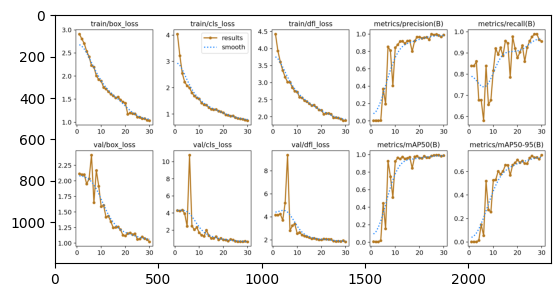

In [86]:
%matplotlib inline

loss = cv2.imread(r"C:\Users\Jakub Lechowski\Desktop\master-thesis\code\runs\detect\detection_train\results.png")
plt.imshow(loss)

In [ ]:
metrics = model.val()

In [59]:
metrics.confusion_matrix.matrix

array([[         91,           5],
       [          2,           0]])

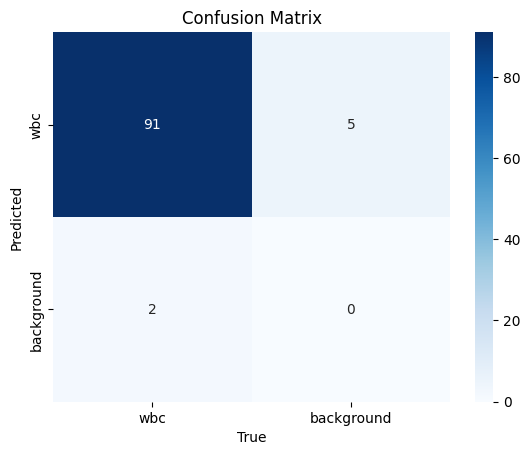

In [60]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix.matrix, annot=True, cmap="Blues", xticklabels=["wbc", "background"], yticklabels=["wbc", "background"])
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Confusion Matrix')
plt.show()

In [69]:
metrics.results_dict

{'metrics/precision(B)': 0.9888580226303714,
 'metrics/recall(B)': 0.9543307663362826,
 'metrics/mAP50(B)': 0.9891162030528502,
 'metrics/mAP50-95(B)': 0.7398975815540756,
 'fitness': 0.764819443703953}

# Make yolo labels prediction on dataset3

## Prepare dataset 3

### Structure overview

In [98]:
DATASET_3_PATH = os.path.join(DATASETS_ROOT_PATH, "dataset3")

In [104]:
dataset_3_classes = os.listdir(DATASET_3_PATH)
dataset_3_classes

['Basophile',
 'Eosinophile',
 'images',
 'Lymphoblast',
 'Lymphocyte',
 'Monocyte',
 'Myeloblast',
 'Neutrophile Band',
 'Neutrophile Segment',
 'Normoblast',
 'predicted_yolo_labels']

In [100]:
os.listdir(os.path.join(DATASET_3_PATH, "Basophile"))

['images']

In [101]:
os.listdir(os.path.join(DATASET_3_PATH, "Basophile", "images"))[:5]

['0.bmp', '1.bmp', '10.bmp', '100.bmp', '1000.bmp']

### Preparation

In [102]:
if not os.path.exists(os.path.join(DATASET_3_PATH, "images")):
    os.mkdir(os.path.join(DATASET_3_PATH, "images"))

In [108]:
image_destination = os.path.join(DATASET_3_PATH, "images")

for dataset3_class in dataset_3_classes:
    source_path_dir = os.path.join(DATASET_3_PATH, dataset3_class, "images")
    if os.path.exists(source_path_dir):
        for img in os.listdir(source_path_dir):
            os.rename(os.path.join(source_path_dir, img), os.path.join(image_destination, f"{dataset3_class}_{img}"))

**INFO** Now all images from wbc class have filename with class prefix and are in the same folder "images" 

# Predict

In [ ]:
if not os.path.exists(os.path.join(DATASET_3_PATH, "predicted_yolo_labels")):    
    os.mkdir(os.path.join(DATASET_3_PATH, "predicted_yolo_labels"))

In [117]:
import pandas as pd
def predict_labels(yolo_model, img_dir: str, label_dir: str):
    predictions = yolo_model.predict(img_dir, save=False, verbose=True, stream=True)
        
    item_df = pd.DataFrame(
        columns=[
            "img_name",
            "label",
            "x_center",
            "y_center",
            "width",
            "height",
        ]
    )
    for item in predictions:
        image_name = os.path.splitext(os.path.basename(item.path))[0]
        n_objects_detected = item.boxes.shape[0]

        for i in range(n_objects_detected):
            row = {}
            row["img_name"] = image_name
            row["label"] = int(item.boxes.cls[i].tolist())
            row["x_center"] =  item.boxes.xywhn[i][0].tolist()
            row["y_center"] =  item.boxes.xywhn[i][1].tolist()
            row["width"] =  item.boxes.xywhn[i][2].tolist()
            row["height"] =  item.boxes.xywhn[i][3].tolist()
            row_df = pd.DataFrame(row, index=[0])
            item_df = pd.concat([item_df, row_df])
    save_yolo_labels(item_df, label_dir)
    return item_df

# Predict dataset3

In [118]:
labels = predict_labels(model, os.path.join(DATASET_3_PATH, "images"),  os.path.join(DATASET_3_PATH, "predicted_yolo_labels"))


image 1/16027 D:\master_thesis_wd\datasets\dataset3\images\Basophile_0.bmp: 640x640 (no detections), 92.0ms
image 2/16027 D:\master_thesis_wd\datasets\dataset3\images\Basophile_1.bmp: 640x640 (no detections), 51.0ms
image 3/16027 D:\master_thesis_wd\datasets\dataset3\images\Basophile_10.bmp: 640x640 (no detections), 38.6ms
image 4/16027 D:\master_thesis_wd\datasets\dataset3\images\Basophile_100.bmp: 640x640 3 wbcs, 63.0ms
image 5/16027 D:\master_thesis_wd\datasets\dataset3\images\Basophile_1000.bmp: 640x640 1 wbc, 4.5ms
image 6/16027 D:\master_thesis_wd\datasets\dataset3\images\Basophile_1001.bmp: 640x640 1 wbc, 4.0ms
image 7/16027 D:\master_thesis_wd\datasets\dataset3\images\Basophile_1002.bmp: 640x640 1 wbc, 3.0ms
image 8/16027 D:\master_thesis_wd\datasets\dataset3\images\Basophile_1003.bmp: 640x640 1 wbc, 4.0ms
image 9/16027 D:\master_thesis_wd\datasets\dataset3\images\Basophile_1004.bmp: 640x640 1 wbc, 4.0ms
image 10/16027 D:\master_thesis_wd\datasets\dataset3\images\Basophile_100

100%|██████████████████████████████████████████████████████████████████████████| 11767/11767 [00:07<00:00, 1615.11it/s]


# Add wbc class to dataset3 labels

In [120]:
wbc_dataset3_labels = {
    "Basophile": 0,
    "Eosinophile": 1,
    "Lymphoblast": 2,
    "Lymphocyte": 3,
    "Monocyte": 4,
    "Myeloblast": 5,
    "Neutrophile Band": 6,
    "Neutrophile Segment": 7,
    "Normoblast": 8,
}

In [ ]:
from tqdm import tqdm

In [121]:
predicted_labels_path = os.path.join(DATASET_3_PATH, "predicted_yolo_labels")
for file in tqmd(os.listdir(predicted_labels_path)):
    file_path = os.path.join(predicted_labels_path, file)
    class_name = file.split("_")[0]
    label_df = pd.read_csv(file_path, header=None, sep=" ")
    label_df.iloc[:, 0] = wbc_dataset3_labels[class_name]
    label_df.to_csv(file_path, index=False, sep= " ", header=None)

# Show some images with prediction labels form dataset 3

In [123]:
import random

In [126]:
invert_wbc_dataset3_labels = {str(v): k for k, v in wbc_dataset3_labels.items() }

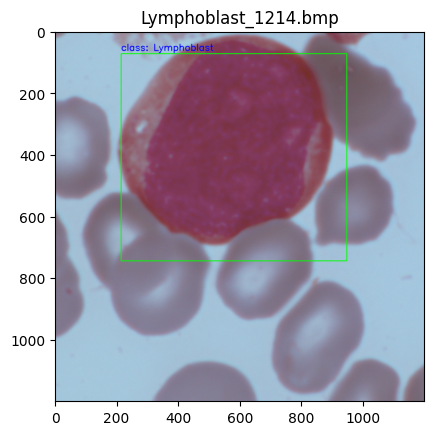

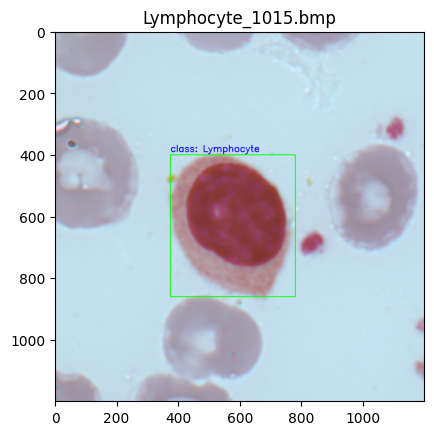

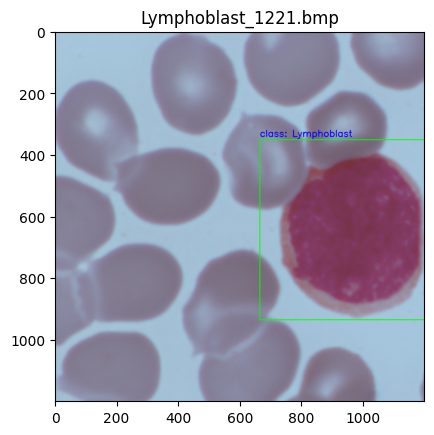

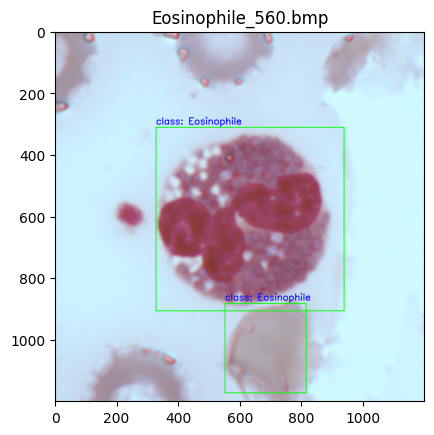

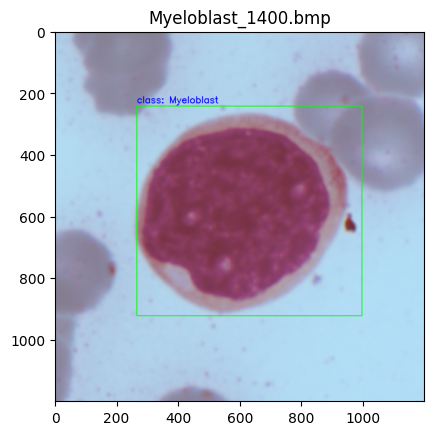

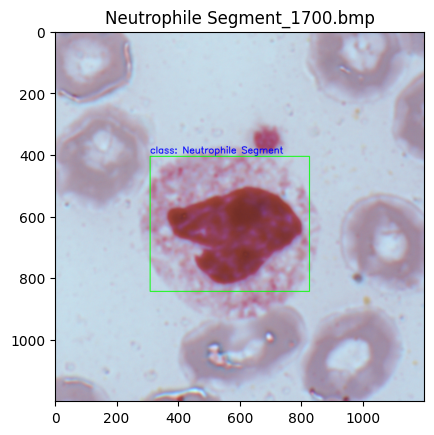

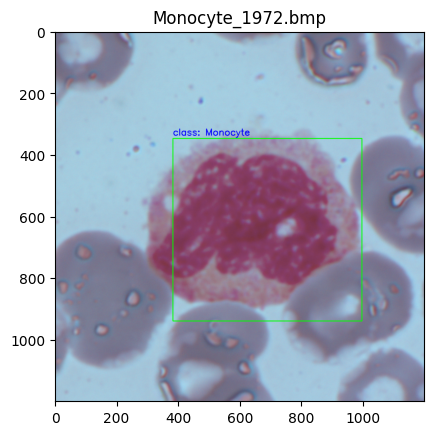

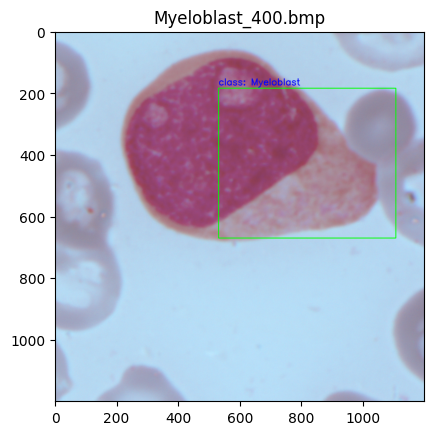

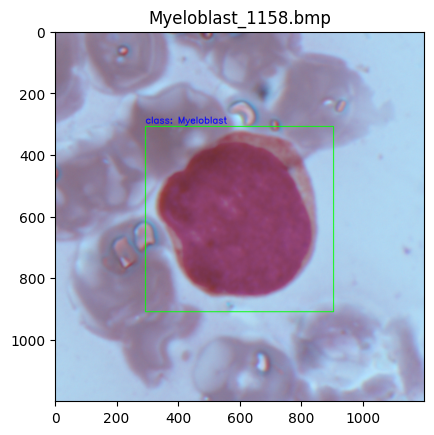

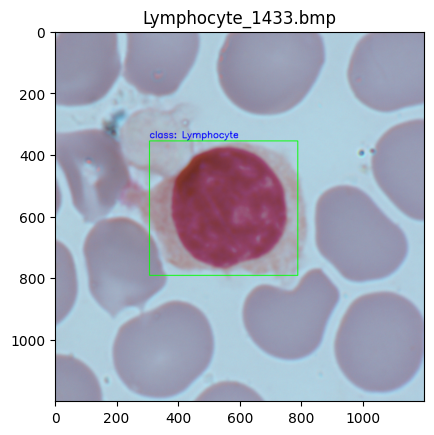

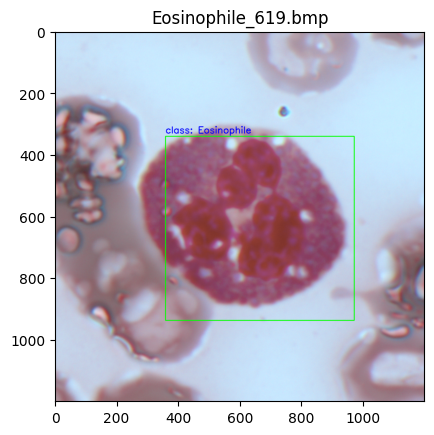

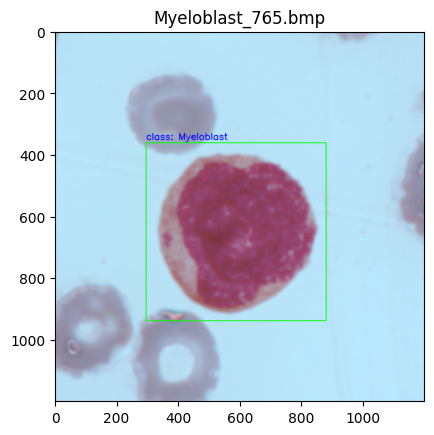

In [127]:
IMAGES_PATH = os.path.join(DATASET_3_PATH, "images")
YOLO_LABELS_PATH =  os.path.join(DATASET_3_PATH, "predicted_yolo_labels")
for image_path in random.sample(os.listdir(IMAGES_PATH), 20):
    label_path = os.path.join(YOLO_LABELS_PATH, os.path.splitext(image_path)[0] + ".txt")
    if not os.path.exists(label_path):
        continue
    show_labeled_image(os.path.join(IMAGES_PATH, image_path), label_path, label_map = invert_wbc_dataset3_labels)